# <center> Classification Mycetoma</center>
<center> <FONT size="5pt"> by linear model </FONT> </center>

<i> <b> Informations about this file :</b> </i> <br>
in this file, we try to automatically differentiate according to 102 labels a fungal mycetoma and a bacterial up to at least 75%

# __________________________________________________________________

<i> <b> Importations necessary:</b> </i> <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, metrics, svm

from sklearn.metrics import f1_score, roc_curve, roc_auc_score

from scikitplot.metrics import plot_confusion_matrix

# <font size="5pt" color ="FireBrick" > <center> Part of data management </center> </font>

In [2]:
%run dataManagement.ipynb

 - Creation of data set 

In [3]:
# data set number 1
DS1= 'radiomics_features_set1.csv'

# data set number 2
DS2= 'radiomics_features_set2.csv'

data = readCSV(DS1,DS2)


- Training data 

In [4]:
y = getLabels(data)
X = getData(data)

# preprocessing the data to remove negative numbers
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print("Training data dimension :",X_train.shape)
print("Test data dimension :",X_test.shape)


Training data dimension : (646, 102)
Test data dimension : (216, 102)


# <font size="5pt" color ="FireBrick" > <center> Part classification by linear model </center> </font>

- Logistic regression

In [6]:
LR = LogisticRegression().fit(X_train,y_train)

y_LR = LR.predict(X_test)

print("score of Logistic Regression :", metrics.accuracy_score(y_test,y_LR))


score of Logistic Regression : 0.8703703703703703


- Support Vector Machines

In [7]:
SVM = svm.SVC().fit(X_train,y_train)

y_SVM = SVM.predict(X_test)

print("score of Support Vector Machines:", metrics.accuracy_score(y_test,y_SVM))


score of Support Vector Machines: 0.8935185185185185


- Linear Discriminant Analysis

In [8]:
LDA= LinearDiscriminantAnalysis().fit(X_train,y_train)


y_LDA= LDA.predict(X_test)


print("score of Linear Discriminant Analysis:",  metrics.accuracy_score(y_test,y_LDA))

score of Linear Discriminant Analysis: 0.9305555555555556


- KNeighbors Classifier

In [9]:
KNN = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)

y_KNN = KNN.predict(X_test)

print("score of KNeighbors Classifier :", metrics.accuracy_score(y_test,y_KNN))


score of KNeighbors Classifier : 0.8518518518518519


# <font size="5pt" color ="FireBrick" > <center> Part evaluation method </center> </font>


# <font size="5pt"> <center> Cross validation </center> </font>

In [10]:
cross_validation_LR = cross_val_score(LR, X, y)
print("Evaluation for Logistic regression :",cross_validation_LR)


Evaluation for Logistic regression : [0.8150289  0.88439306 0.88953488 0.93604651 0.90116279]


In [11]:
cross_validation_SVM = cross_val_score(SVM, X, y)
print("Evaluation for Support Vector Machines:",cross_validation_SVM )

Evaluation for Support Vector Machines: [0.86127168 0.89017341 0.89534884 0.94767442 0.89534884]


In [12]:
cross_validation_LDA = cross_val_score(LDA, X, y)

print("Evaluation for Linear Discriminant Analysis :",cross_validation_LDA)

Evaluation for Linear Discriminant Analysis : [0.95375723 0.95375723 0.89534884 0.95930233 0.94186047]


In [13]:
cross_validation_KNN = cross_val_score(KNN, X, y)

print("Evaluation for KNeighbors Classifier :",cross_validation_KNN )

Evaluation for KNeighbors Classifier : [0.77456647 0.84393064 0.90116279 0.93023256 0.90116279]



# <font size="5pt"> <center> Confusion matrix </center> </font>

<AxesSubplot:title={'center':'Confusion Matric of Logistic regression'}, xlabel='Predicted label', ylabel='True label'>

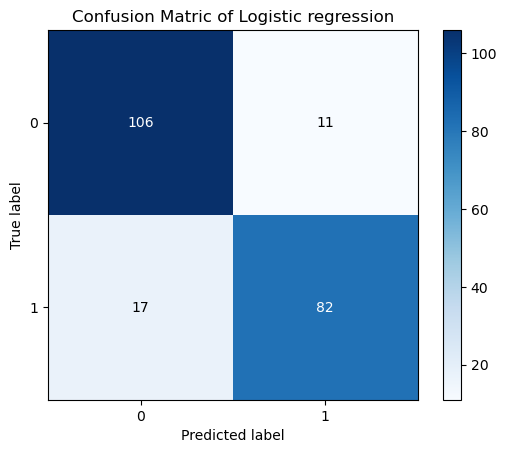

In [14]:
plot_confusion_matrix(y_test, y_LR, title="Confusion Matric of Logistic regression") 


<AxesSubplot:title={'center':'Confusion Matric of Support Vector Machines'}, xlabel='Predicted label', ylabel='True label'>

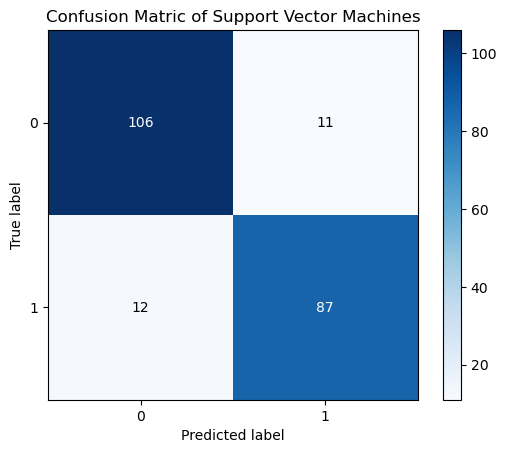

In [15]:
plot_confusion_matrix(y_test, y_SVM, title="Confusion Matric of Support Vector Machines") 



<AxesSubplot:title={'center':'Confusion Matric of Linear Discriminant Analysis'}, xlabel='Predicted label', ylabel='True label'>

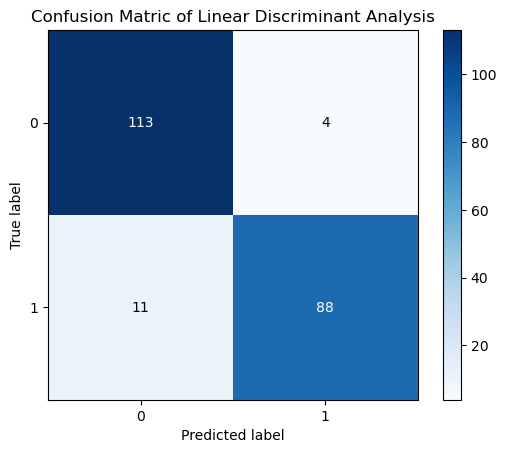

In [16]:
plot_confusion_matrix(y_test, y_LDA, title="Confusion Matric of Linear Discriminant Analysis") 


<AxesSubplot:title={'center':'Confusion Matric of KNeighbors Classifier'}, xlabel='Predicted label', ylabel='True label'>

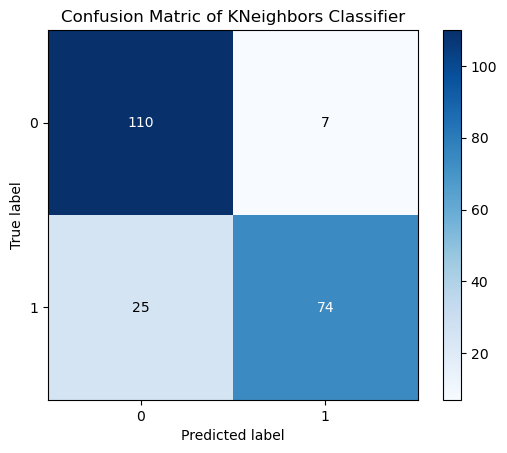

In [17]:
plot_confusion_matrix(y_test, y_KNN, title="Confusion Matric of KNeighbors Classifier") 



# <font size="5pt"> <center> Précision, Rappel, F-mesure </center> </font>

In [18]:
f1_LR = f1_score(y_test,y_LR)
print("Result for Logistic regression : ",f1_LR)

Result for Logistic regression :  0.8541666666666666


In [19]:
f1_SVM = f1_score(y_test,y_SVM)
print("Result for Support Vector Machines : ",f1_SVM)

Result for Logistic regression :  0.8832487309644671


In [20]:
f1_LDA = f1_score(y_test,y_LDA)
print("Result for Linear Discriminant Analysis : ",f1_LDA)

Result for Logistic regression :  0.9214659685863874


In [22]:
f1_KNN = f1_score(y_test,y_KNN)
print("Result for KNeighbors Classifier : ",f1_KNN)

Result for Logistic regression :  0.8222222222222223



# <font size="5pt"> <center> ROC curve </center> </font>

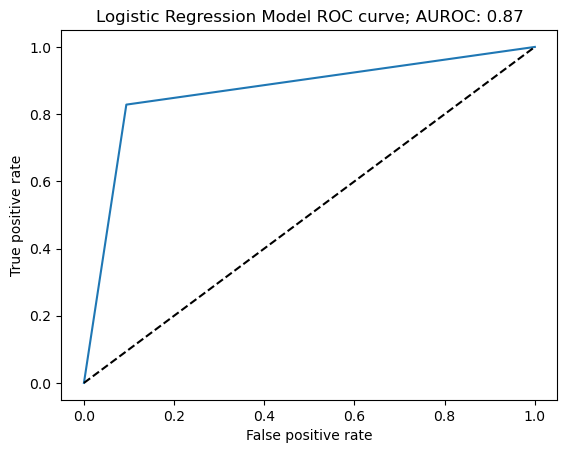

In [21]:


fpr,tpr,thresholds = roc_curve(y_test,y_LR)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_LR), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

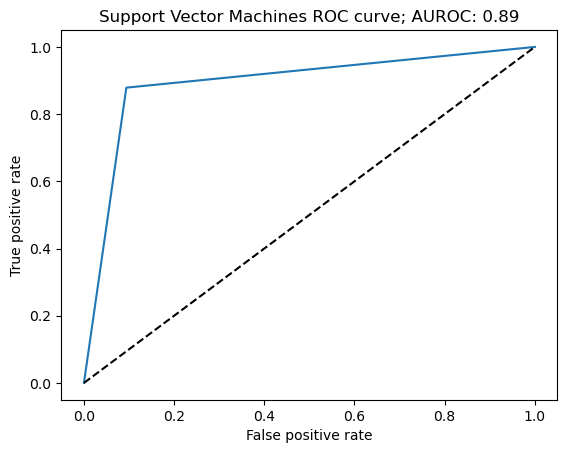

In [27]:


fpr,tpr,thresholds = roc_curve(y_test,y_SVM)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_SVM), 2)

plt.title(f'Support Vector Machines ROC curve; AUROC: {AUROC}');
plt.show()

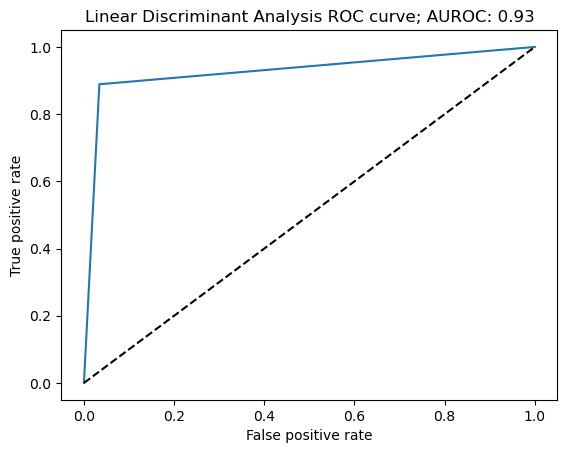

In [26]:


fpr,tpr,thresholds = roc_curve(y_test,y_LDA)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_LDA), 2)

plt.title(f'Linear Discriminant Analysis ROC curve; AUROC: {AUROC}');
plt.show()

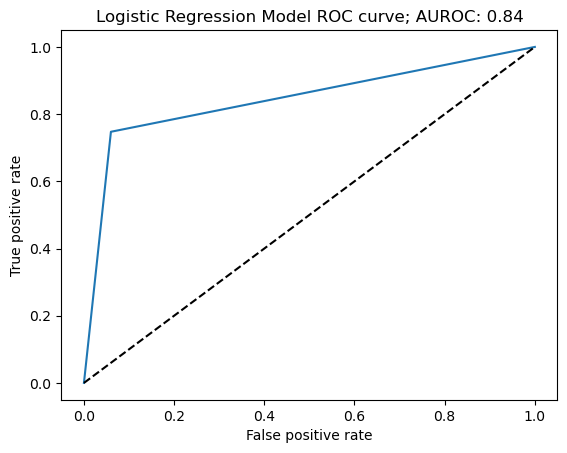

In [25]:


fpr,tpr,thresholds = roc_curve(y_test,y_KNN)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_KNN), 2)

plt.title(f'KNeighbors Classifier Model ROC curve; AUROC: {AUROC}');
plt.show()